# Demonstration of Leapfrog Optimizer

This notebook tests the Leapfrog optimizer by Mark Redd:

- [lpfgopt](https://github.com/flythereddflagg/lpfgopt) (2020)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

import lpfgopt
lpfgopt.__version__

'1.0.1'

In [2]:
from platform import python_version
python_version()

'3.10.18'

## Demonstration on simple 1-D function 

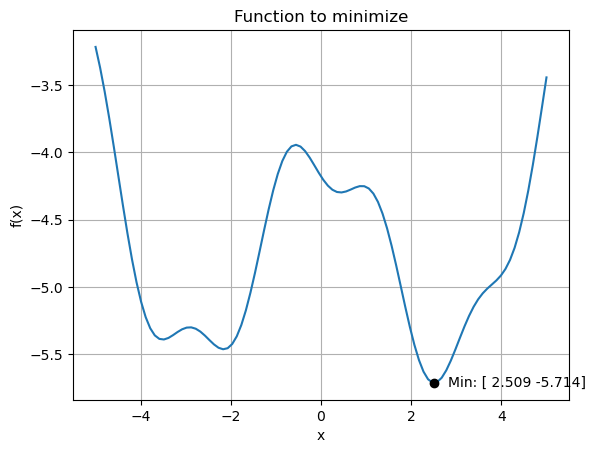

In [3]:
def function_to_minimize(x):
    return np.array([
        -(-0.05*x[0]**2 - np.cos(x[0]) + 0.25*np.sin(3*x[0] + 0.8) + 5)
    ])

X = np.linspace(-5, 5, 100).reshape(1, -1)
Y = function_to_minimize(X)

# Compute minimum numerically
sol = minimize(function_to_minimize, x0=[2])
assert sol.status == 0
min_pt = np.array([sol.x[0], sol.fun])

plt.plot(X.T, Y.T)
plt.plot(*min_pt, 'ko')
plt.annotate(f'Min: {min_pt.round(3)}', min_pt, xytext=(10, 0),
             textcoords='offset points', va='center')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function to minimize')
plt.grid()

Solution: [ 2.509 -5.714]


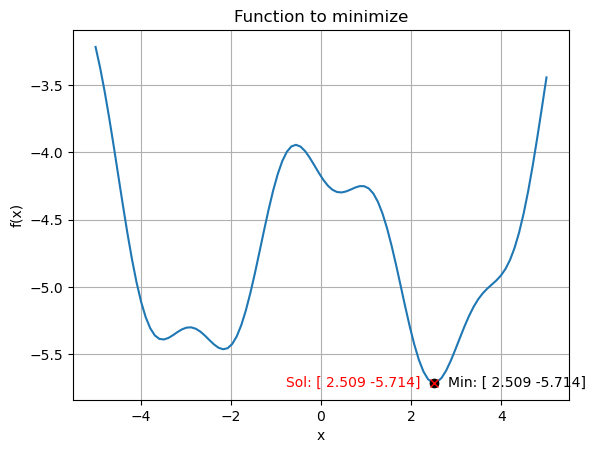

In [4]:
# Define bounded region of parameter space
bounds = [(-5, 5)]

# Run optimizer
# run the optimization
sol = lpfgopt.minimize(function_to_minimize, bounds)
assert sol.status == 0
sol_pt = np.array([sol['x'][0], sol['fun'][0]])
print(f"Solution: {sol_pt.round(3)}")

plt.plot(X.T, Y.T)
plt.plot(*min_pt, 'ko')
plt.annotate(f'Min: {min_pt.round(3)}', min_pt, xytext=(10, 0),
             textcoords='offset points', va='center')
plt.plot(*sol_pt, 'rx')
plt.annotate(f'Sol: {sol_pt.round(3)}', sol_pt, xytext=(-10, 0),
             textcoords='offset points', ha='right', va='center', color='r')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function to minimize')
plt.grid()

## Check repeatability

In [5]:
from collections import Counter

Counter([round(lpfgopt.minimize(function_to_minimize, bounds)['x'][0], 3) for _ in range(100)])

Counter({2.509: 91, -2.159: 8, -3.512: 1})